In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mental_health_analysis.csv')

In [ ]:
df.head()

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,F,9.654486,2.458001,5.198926,8.158189,3,0.288962,Moderate,Excellent
1,2,17,M,9.158143,0.392095,8.866097,5.151993,5,0.409446,Moderate,Good
2,3,15,M,5.028755,0.520119,4.943095,9.209325,2,0.423837,Moderate,Poor
3,4,17,F,7.951103,1.022630,5.262773,9.823658,5,0.666021,Moderate,Average
4,5,17,F,1.357459,1.225462,6.196080,11.338990,5,0.928060,High,Poor


In [ ]:
df.shape

(5000, 11)

In [ ]:
df.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Social_Media_Hours,0
Exercise_Hours,0
Sleep_Hours,0
Screen_Time_Hours,0
Survey_Stress_Score,0
Wearable_Stress_Score,0
Support_System,0


Encoding gender, support system and academic performance

In [4]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [5]:
df['Support_System']=df['Support_System'].map({'Low':0,'Moderate':1,'High':2})

In [6]:
df['Academic_Performance']=df['Academic_Performance'].map({'Poor':0,'Average':1,'Good':2,'Excellent':3})

In [ ]:
df.head()

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance
0,1,16,0,9.654486,2.458001,5.198926,8.158189,3,0.288962,1,3
1,2,17,1,9.158143,0.392095,8.866097,5.151993,5,0.409446,1,2
2,3,15,1,5.028755,0.520119,4.943095,9.209325,2,0.423837,1,0
3,4,17,0,7.951103,1.022630,5.262773,9.823658,5,0.666021,1,1
4,5,17,0,1.357459,1.225462,6.196080,11.338990,5,0.928060,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User_ID                5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   int64  
 3   Social_Media_Hours     5000 non-null   float64
 4   Exercise_Hours         5000 non-null   float64
 5   Sleep_Hours            5000 non-null   float64
 6   Screen_Time_Hours      5000 non-null   float64
 7   Survey_Stress_Score    5000 non-null   int64  
 8   Wearable_Stress_Score  5000 non-null   float64
 9   Support_System         5000 non-null   int64  
 10  Academic_Performance   5000 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 429.8 KB


do stress scores vary based on gender?

In [ ]:
from scipy.stats import ttest_ind

male_stress = df[df['Gender'] == 1]['Survey_Stress_Score']
female_stress = df[df['Gender'] == 0]['Survey_Stress_Score']

t_stat, p_val = ttest_ind(male_stress, female_stress)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

T-statistic: -0.1211, p-value: 0.9036


In [ ]:
alpha=0.05
if p_val<alpha:
    print('Reject Null Hypothesis: There is a significant difference in stress scores by gender.')
else:
    print('Accept Null Hypothesis: No significant difference in stress scores by gender.')

Accept Null Hypothesis: No significant difference in stress scores by gender.


check if sleep hours and exercise hours are correlated

In [ ]:
from scipy.stats import pearsonr
r,_=pearsonr(df['Exercise_Hours'],df['Sleep_Hours'])

In [ ]:
print('correlation co-efficient:',r)

correlation co-efficient: 0.019299913747197903


In [ ]:
if r>0:
  print('Exercise_Hours and Sleep_Hours are positively correlated and the value for r is:',round(r,4))
elif r<0:
  print('Exercise_Hours and Sleep_Hours are negatively correlated and the value for r is:',round(r,4))
else:
  print('Exercise_Hours and Sleep_Hours are not correlated')

Exercise_Hours and Sleep_Hours are positively correlated and the value for r is: 0.0193


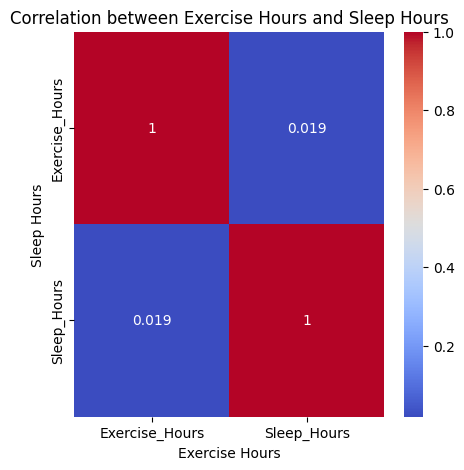

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df[['Exercise_Hours','Sleep_Hours']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation between Exercise Hours and Sleep Hours')
plt.xlabel('Exercise Hours')
plt.ylabel('Sleep Hours')

plt.show()

In [3]:
df_new=pd.read_csv('mxmh_survey_results.csv')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [ ]:
df_new.shape

(736, 33)

In [ ]:
df_new.isnull().sum()

,0
Timestamp,0
Age,1
Primary streaming service,1
Hours per day,0
While working,3
Instrumentalist,4
Composer,1
Fav genre,0
Exploratory,0
Foreign languages,4


In [7]:
df_new.dropna(inplace=True)

In [ ]:
df_new.shape

(616, 33)

In [ ]:
df_new.isnull().sum()

,0
Timestamp,0
Age,0
Primary streaming service,0
Hours per day,0
While working,0
Instrumentalist,0
Composer,0
Fav genre,0
Exploratory,0
Foreign languages,0


In [ ]:
df_new.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.


In [ ]:
df_new['Frequency [Lofi]'].unique()

array(['Sometimes', 'Very frequently', 'Rarely', 'Never'], dtype=object)

encode

In [8]:
df_new['Frequency [Lofi]']=df_new['Frequency [Lofi]'].map({'Never':0,'Rarely':1,'Sometimes':2,'Very frequently':3})

In [ ]:
df_new['Frequency [Lofi]'].unique()

array([2, 3, 1, 0])

In [ ]:
df_new['Frequency [Lofi]']

,Frequency [Lofi]
2,2
3,2
4,2
5,3
6,1
...,...
731,1
732,1
733,2
734,0


check for correlation between anxiety and frequency of listening to lofi music

In [ ]:
from scipy.stats import pearsonr
r,_=pearsonr(df_new['Frequency [Lofi]'],df_new['Anxiety'])

In [ ]:
print('correlation co-efficient:',r)

correlation co-efficient: 0.06358510258628539


In [ ]:
if r>0:
  print('frequency of listening to Lofi and anxiety levels are positively correlated and the value for r is:',round(r,4))
elif r<0:
  print('frequency of listening to Lofi and anxiety levels are negatively correlated and the value for r is:',round(r,4))
else:
  print('frequency of listening to Lofi and anxiety levels are not correlated')

frequency of listening to Lofi and anxiety levels are positively correlated and the value for r is: 0.0636


encode

In [ ]:
df_new['While working']=df_new['While working'].map({'Yes':1,'No':0})

does anxiety vary based on composer or non composer?

In [ ]:
from scipy.stats import ttest_ind

composer = df_new[df_new['Composer'] == 'Yes']['Anxiety']
non_composer = df_new[df_new['Composer'] == 'No']['Anxiety']
t_stat, p_val = ttest_ind(composer, non_composer)


In [ ]:
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")

T-statistic: 0.2893, p-value: 0.7725


In [ ]:
alpha=0.05
if p_val<alpha:
    print('Reject Null Hypothesis: There is a difference in anxiety between composers and non-composers.')
else:
    print('Accept Null Hypothesis: No difference in anxiety between composers and non-composers.')

Accept Null Hypothesis: No difference in anxiety between composers and non-composers.


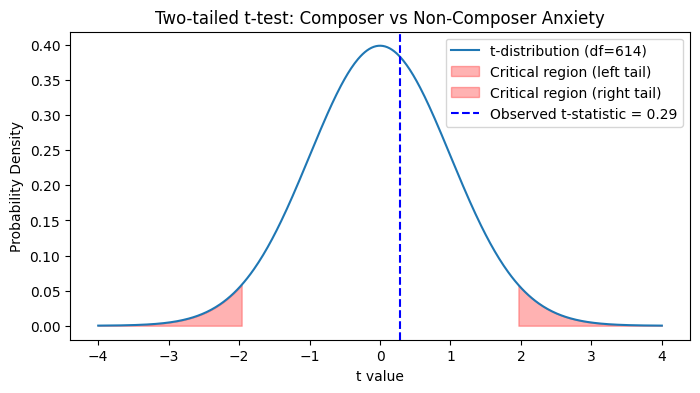

In [ ]:
df = len(composer) + len(non_composer) - 2

# Significance level
alpha = 0.05

x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

t_crit_left = t.ppf(alpha / 2, df)
t_crit_right = t.ppf(1 - alpha / 2, df)

plt.figure(figsize=(8,4))
plt.plot(x, y, label=f't-distribution (df={df})')

plt.fill_between(x, 0, y, where=(x <= t_crit_left), color='red', alpha=0.3, label='Critical region (left tail)')
plt.fill_between(x, 0, y, where=(x >= t_crit_right), color='red', alpha=0.3, label='Critical region (right tail)')

plt.axvline(t_stat, color='blue', linestyle='--', label=f'Observed t-statistic = {t_stat:.2f}')

plt.title('Two-tailed t-test: Composer vs Non-Composer Anxiety')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

In [9]:
combined_data=pd.concat([df,df_new[['Anxiety','Depression','Insomnia','OCD']]],axis=1)

In [ ]:
combined_data.head()

,User_ID,Age,Gender,Social_Media_Hours,Exercise_Hours,Sleep_Hours,Screen_Time_Hours,Survey_Stress_Score,Wearable_Stress_Score,Support_System,Academic_Performance,Anxiety,Depression,Insomnia,OCD
0,1,16,0,9.654486,2.458001,5.198926,8.158189,3,0.288962,1,3,NaN,NaN,NaN,NaN
1,2,17,1,9.158143,0.392095,8.866097,5.151993,5,0.409446,1,2,NaN,NaN,NaN,NaN
2,3,15,1,5.028755,0.520119,4.943095,9.209325,2,0.423837,1,0,7.0,7.0,10.0,2.0
3,4,17,0,7.951103,1.022630,5.262773,9.823658,5,0.666021,1,1,9.0,7.0,3.0,3.0
4,5,17,0,1.357459,1.225462,6.196080,11.338990,5,0.928060,2,0,7.0,2.0,5.0,9.0


In [10]:
combined_data.dropna(inplace=True)

In [ ]:
combined_data.isnull().sum()

,0
User_ID,0
Age,0
Gender,0
Social_Media_Hours,0
Exercise_Hours,0
Sleep_Hours,0
Screen_Time_Hours,0
Survey_Stress_Score,0
Wearable_Stress_Score,0
Support_System,0


variation in anxiety based on gender

In [ ]:
male_anx=combined_data[combined_data['Gender']==1]['Anxiety']
female_anx=combined_data[combined_data['Gender']==0]['Anxiety']
t_stat,pval=ttest_ind(male_anx,female_anx)
print(f"t-value:{t_stat:.4f},p-value:{p_val:.4f}")

t-value:-0.5036,p-value:0.0991


In [ ]:
aplha=0.05
if p_val < alpha:
    print(f"Reject H0: There is a significant difference in anxiety scores between genders")
else:
    print(f"Accept H0: No significant difference in anxiety scores between genders")


Accept H0: No significant difference in anxiety scores between genders


In [ ]:
# Degrees of freedom (approximate)
df = len(male_anx) + len(female_anx) - 2

# Significance level
alpha = 0.05

# x-axis values for t-distribution plot
x = np.linspace(-4, 4, 500)
y = t.pdf(x, df)

In [ ]:
t_crit = t.ppf(1 - alpha / 2, df=df)

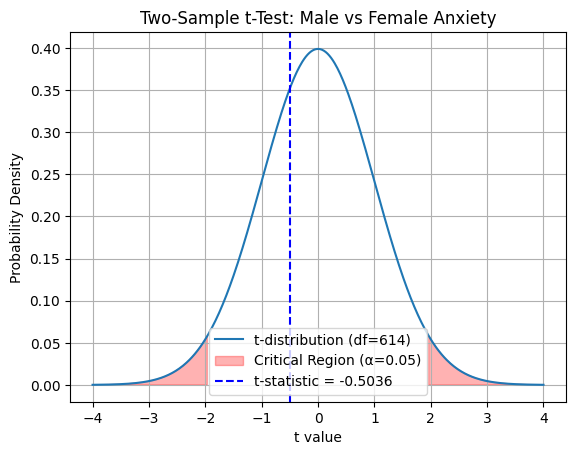

In [ ]:
plt.plot(x, y, label='t-distribution (df={})'.format(df))

plt.fill_between(x, y, where=(x <= -t_crit) | (x >= t_crit), color='red', alpha=0.3, label='Critical Region (α=0.05)')

plt.axvline(t_stat, color='blue', linestyle='--', label=f't-statistic = {t_stat:.4f}')

plt.title('Two-Sample t-Test: Male vs Female Anxiety')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

OCD scores variation between excellent and good performers

In [ ]:
excellent = combined_data[combined_data['Academic_Performance'] == 3]['OCD']
good = combined_data[df['Academic_Performance'] == 2]['OCD']

t_stat, p_val = ttest_ind(excellent, good)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")


T-statistic: 1.6548, p-value: 0.0991


<ipython-input-143-87274f3b3275>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good = combined_data[df['Academic_Performance'] == 2]['OCD']


In [ ]:
alpha=0.10
if p_val < alpha:
    print("Reject H0: Significant difference in OCD scores between Excellent and Good performers.")
else:
    print("Accept H0: No significant difference in OCD scores between Excellent and Good performers.")


Reject H0: Significant difference in OCD scores between Excellent and Good performers.


In [ ]:
aplha=0.10
n1,n2=len(excellent), len(good)
dof=n1+n2-2

In [ ]:
from scipy.stats import t
# Generate x-axis values from -4 to 4 (common range for t-distribution)
x = np.linspace(-4, 4, 500)

# Compute the t-distribution (probability density) values for each x using degrees of freedom
y = t.pdf(x, df=dof)

# Calculate the critical t-value for a two-tailed test at significance level alpha
# This marks the boundary beyond which results are statistically significant
t_crit = t.ppf(1 - alpha / 2, df=dof)


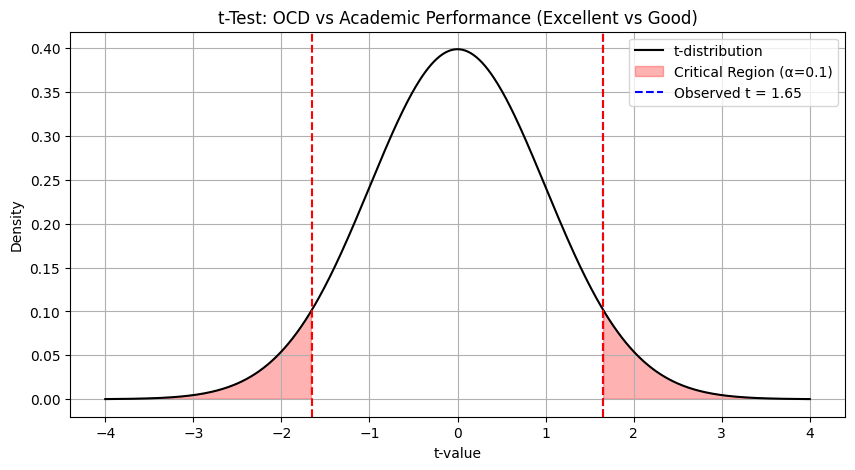

In [ ]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='t-distribution', color='black')
plt.fill_between(x, y, where=(x <= -t_crit) | (x >= t_crit), color='red', alpha=0.3, label='Critical Region (α=0.1)')
plt.axvline(t_stat, color='blue', linestyle='--', label=f'Observed t = {t_stat:.2f}')
plt.axvline(-t_crit, color='red', linestyle='--')
plt.axvline(t_crit, color='red', linestyle='--')

# Labels
plt.title('t-Test: OCD vs Academic Performance (Excellent vs Good)')
plt.xlabel('t-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

linear regression

In [65]:
from sklearn.linear_model import LinearRegression
X=combined_data[['Exercise_Hours']]
y=combined_data['Sleep_Hours']
model=LinearRegression()
model.fit(X,y)
predict=model.predict([[2.45]])
predict

C:\Users\tupka\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.94532344])

In [60]:
from sklearn.linear_model import LinearRegression
X=combined_data[['Anxiety']]
y=combined_data['Depression']
model=LinearRegression()
model.fit(X,y)

LinearRegression()

In [61]:
predict=model.predict([[2.5]])

C:\Users\tupka\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [62]:
predict

array([2.95265695])

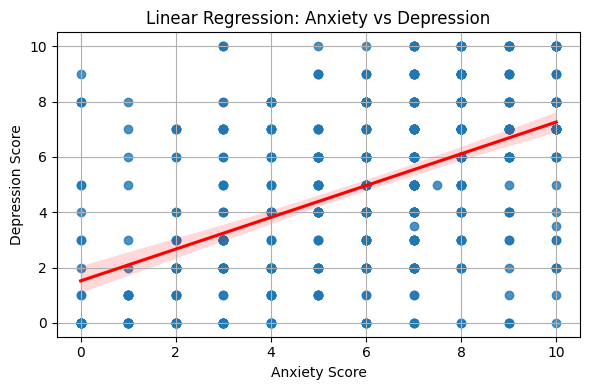

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df_corr = combined_data[['Anxiety', 'Depression']].dropna()
X = df_corr[['Anxiety']]
y = df_corr['Depression']
model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(6, 4))
sns.regplot(x='Anxiety', y='Depression', data=df_corr, line_kws={"color": "red"})
plt.title("Linear Regression: Anxiety vs Depression")
plt.xlabel("Anxiety Score")
plt.ylabel("Depression Score")
plt.grid(True)
plt.tight_layout()
plt.show()


logistice regression

In [ ]:
from sklearn.linear_model import LogisticRegression
combined_data['poor performance']=np.where(combined_data['Academic_Performance']==0,1,0)

In [ ]:
X=combined_data[['Screen_Time_Hours']]
y=combined_data['poor performance']
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [ ]:
predict_performance=model.predict([[2]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(predict_performance)

[0]


In [ ]:
if(predict_performance==1):
  print('poor performance')
else:
  print('good performance')

good performance


KMeans

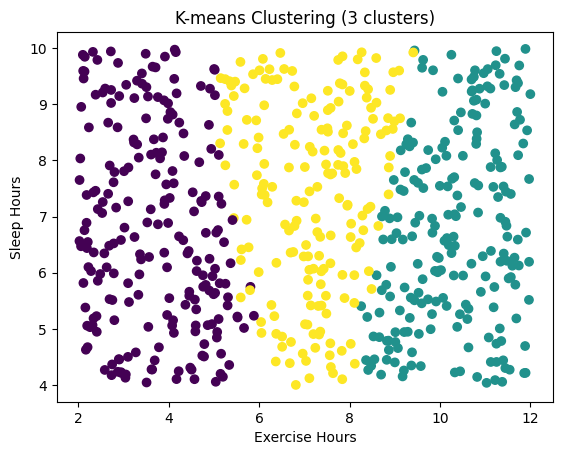

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = ['Age','Exercise_Hours', 'Sleep_Hours', 'Screen_Time_Hours']
X = combined_data[features].dropna()
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to dataframe (optional)
combined_data.loc[X.index, 'Cluster'] = clusters

# Plot clusters (only 2D plot, use first two features)
plt.scatter(X['Screen_Time_Hours'], X['Sleep_Hours'], c=clusters, cmap='viridis')
plt.xlabel('Screen Time Hours')
plt.ylabel('Sleep Hours')
plt.title('K-means Clustering (3 clusters)')
plt.show()


In [21]:
!pip install scikit-learn-extra


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


KMedoids

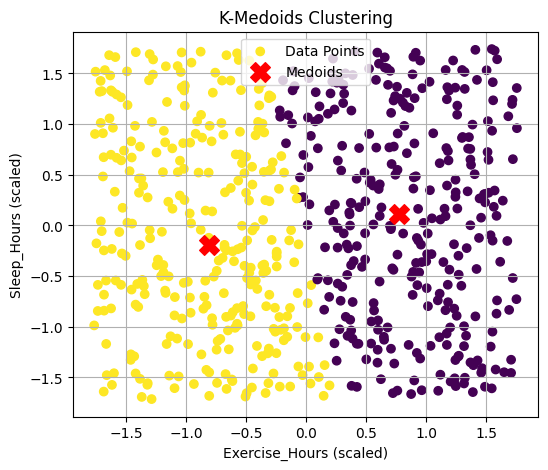

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt

# Select relevant features and drop missing values
X = combined_data[['Exercise_Hours', 'Sleep_Hours']].dropna()

# Scale features (recommended for distance-based clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Medoids with 2 clusters
kmedoids = KMedoids(n_clusters=2, random_state=42)
kmedoids.fit(X_scaled)

# Plot results
plt.figure(figsize=(6, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmedoids.labels_, cmap='viridis', label='Data Points')
plt.scatter(kmedoids.cluster_centers_[:, 0], kmedoids.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Medoids')
plt.xlabel('Exercise_Hours (scaled)')
plt.ylabel('Sleep_Hours (scaled)')
plt.title('K-Medoids Clustering')
plt.legend()
plt.grid(True)
plt.show()


Dendogram

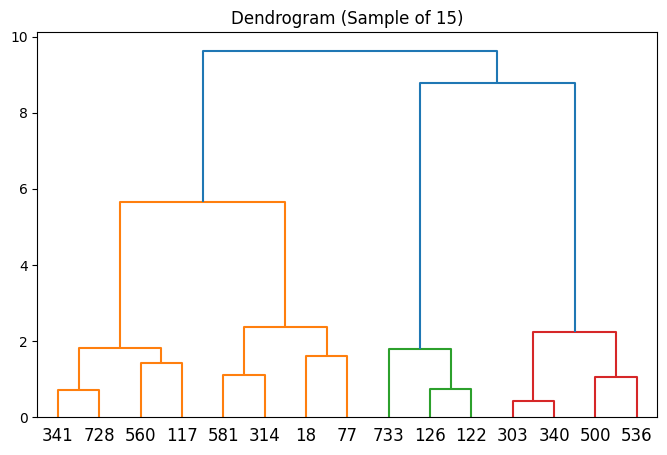

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

X = combined_data[['Age', 'Exercise_Hours', 'Sleep_Hours']].dropna()

X_sample = X.sample(n=15, random_state=1)

linked = linkage(X_sample, method='ward')

# Plot dendrogram
plt.figure(figsize=(8,5))
dendrogram(linked, labels=X_sample.index)
plt.title("Dendrogram (Sample of 15)")
plt.show()

naives bayes for academic performance

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Define target and features
combined_data = combined_data.dropna(subset=['Academic_Performance'])

X = combined_data[['Screen_Time_Hours', 'Social_Media_Hours', 'Sleep_Hours', 'Survey_Stress_Score']]
y = (combined_data['Academic_Performance'] == 0).astype(int)  # 1 = Poor, 0 = Others

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [26]:
new_data = [[9.5, 8.0, 6.0, 10.0]]

prediction = model.predict(new_data)
print("Predicted class:", "Poor" if prediction[0] == 1 else "Not Poor")

Predicted class: Not Poor


C:\Users\tupka\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [32]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Social_Media_Hours', 'Exercise_Hours',
       'Sleep_Hours', 'Screen_Time_Hours', 'Survey_Stress_Score',
       'Wearable_Stress_Score', 'Support_System', 'Academic_Performance'],
      dtype='object')

In [33]:
combined_data.columns

Index(['User_ID', 'Age', 'Gender', 'Social_Media_Hours', 'Exercise_Hours',
       'Sleep_Hours', 'Screen_Time_Hours', 'Survey_Stress_Score',
       'Wearable_Stress_Score', 'Support_System', 'Academic_Performance',
       'Anxiety', 'Depression', 'Insomnia', 'OCD'],
      dtype='object')